In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [6,3]
plt.rcParams['figure.dpi'] = 80

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
cols = titanic.columns

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

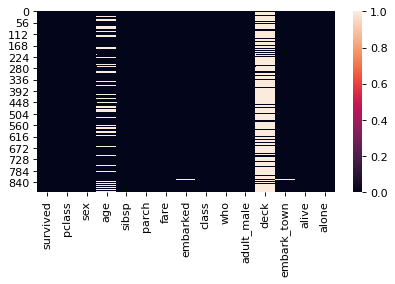

In [8]:
sns.heatmap(titanic.isnull())

In [9]:
cormat = titanic.corr()
cormat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

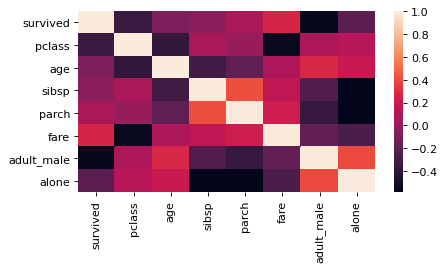

In [10]:
sns.heatmap(cormat)

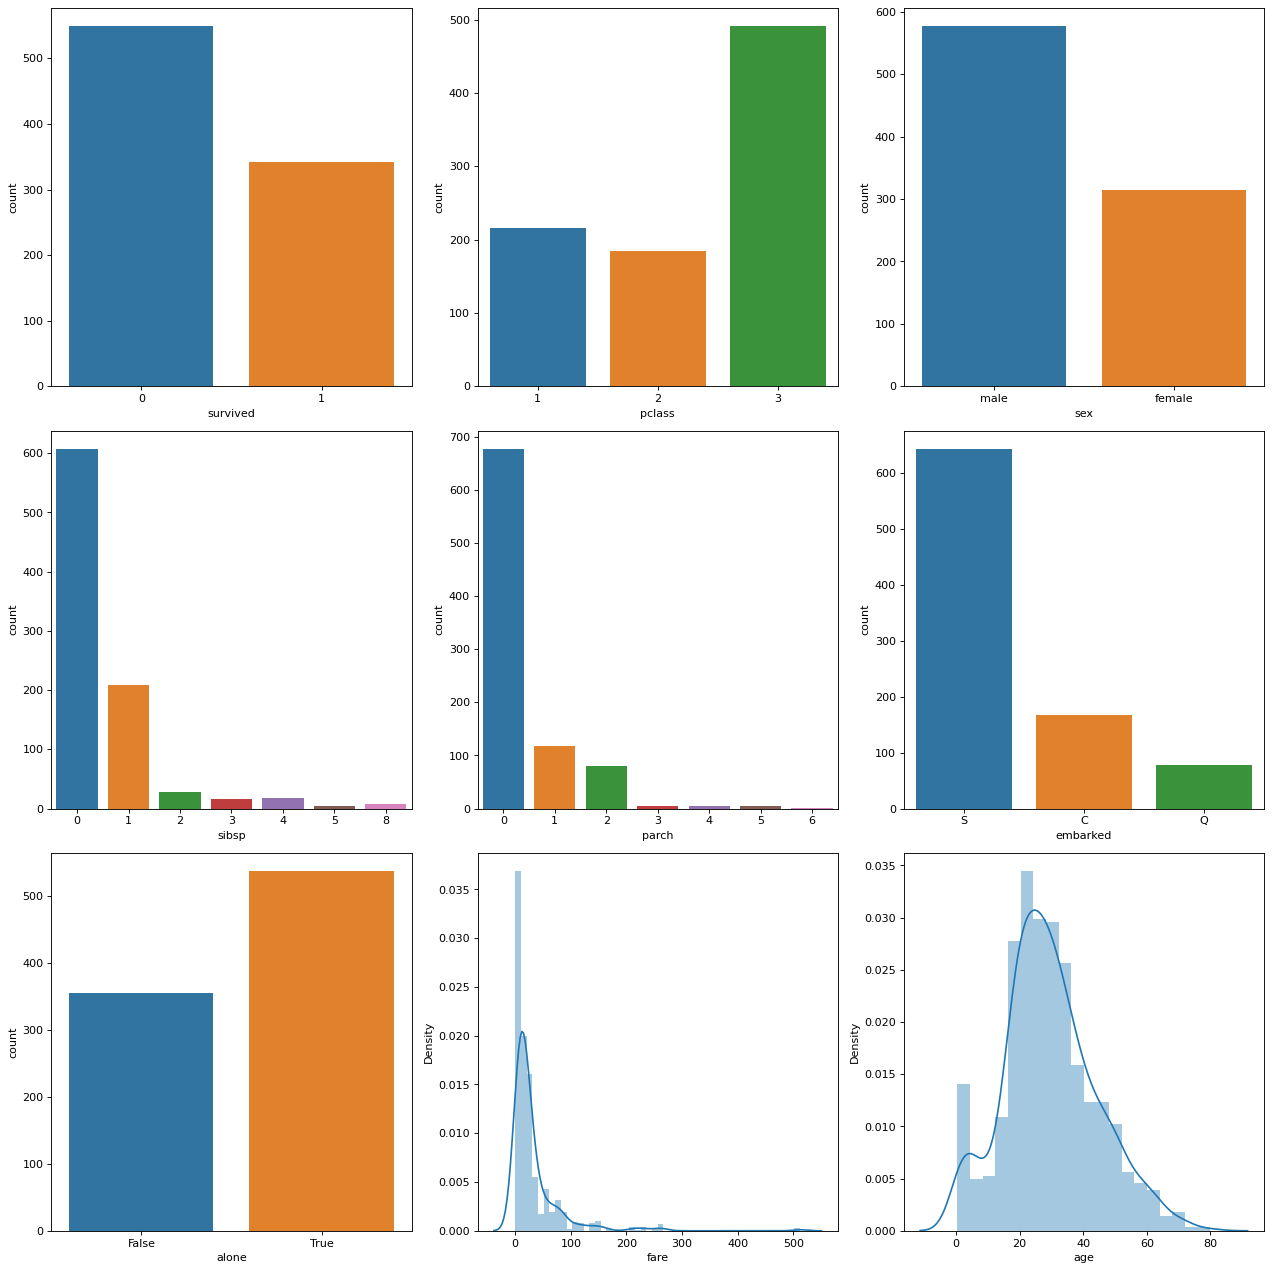

In [11]:
fig,ax = plt.subplots(3,3,figsize = (16,16))

sns.countplot('survived',data=titanic,ax = ax[0][0])
sns.countplot('pclass',data=titanic,ax=ax[0][1])
sns.countplot('sex',data=titanic,ax=ax[0][2])

sns.countplot('sibsp',data=titanic,ax=ax[1][0])
sns.countplot('parch',data=titanic,ax=ax[1][1])

sns.countplot('embarked',data=titanic,ax=ax[1][2])
sns.countplot('alone',data=titanic,ax=ax[2][0])

sns.distplot(titanic['fare'],kde=True,ax=ax[2][1])
sns.distplot(titanic['age'],kde=True,ax=ax[2][2])

plt.tight_layout()
plt.show()

In [12]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

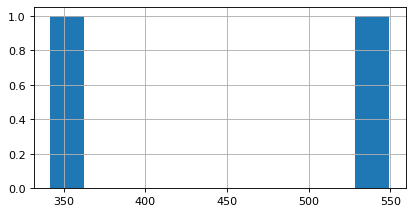

In [13]:
titanic['survived'].value_counts().hist()

<AxesSubplot:ylabel='survived'>

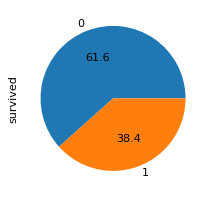

In [14]:
titanic['survived'].value_counts().plot.pie(autopct = '%1.1f')

<AxesSubplot:xlabel='pclass', ylabel='count'>

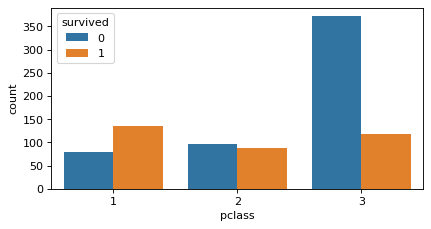

In [15]:
sns.countplot('pclass',data=titanic,hue='survived')

In [16]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [17]:
titanic.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

<AxesSubplot:ylabel='pclass'>

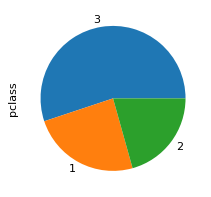

In [18]:
titanic['pclass'].value_counts().plot.pie()

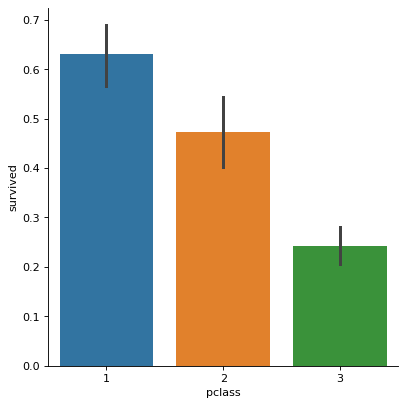

In [19]:
sns.catplot(x = 'pclass', y = 'survived',kind='bar',data=titanic)

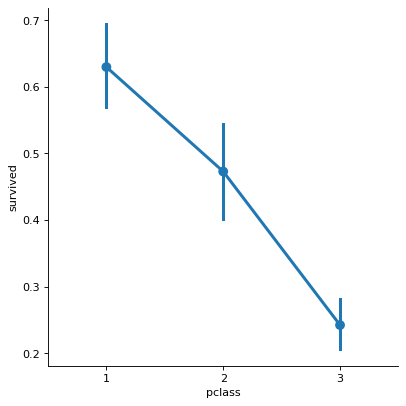

In [20]:
sns.catplot(x='pclass',y='survived',kind='point',data=titanic)

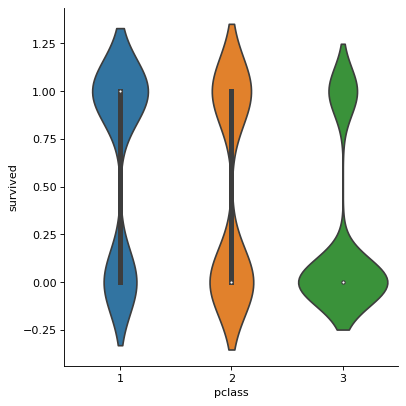

In [21]:
sns.catplot(x='pclass',y='survived',data=titanic,kind='violin')

In [22]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

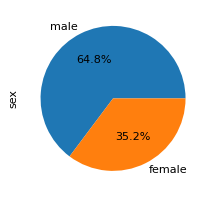

In [23]:
titanic['sex'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='sex', ylabel='count'>

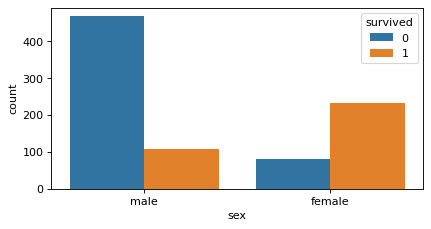

In [24]:
sns.countplot('sex',data=titanic,hue='survived')

In [25]:
titanic.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

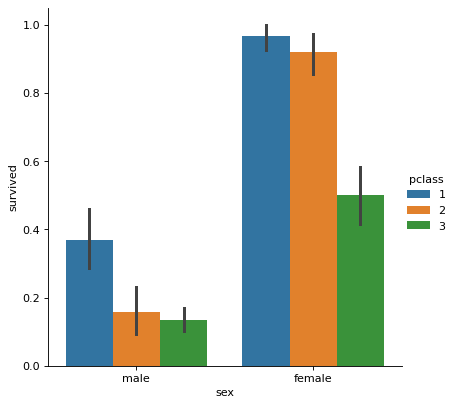

In [26]:
sns.catplot(x='sex',y='survived',data=titanic,kind='bar',hue='pclass')

In [27]:
titanic.groupby(['sex','pclass'])['pclass'].count()

sex     pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: pclass, dtype: int64

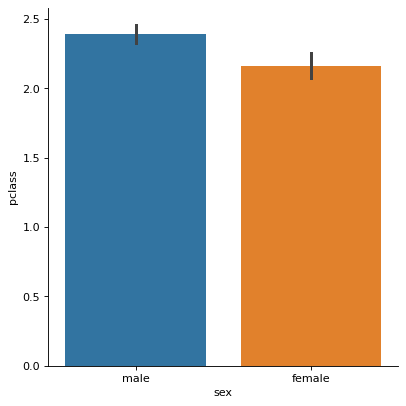

In [28]:
sns.catplot(x='sex',y='pclass',data=titanic,kind='bar')

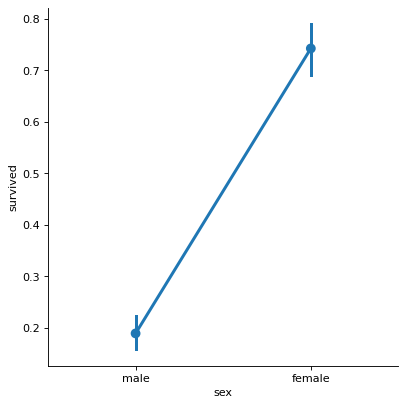

In [29]:
sns.catplot(x='sex',y='survived',data=titanic,kind='point')

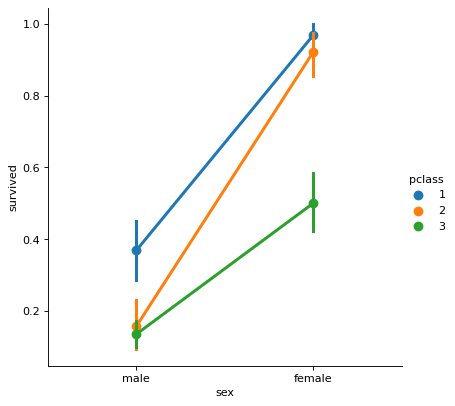

In [30]:
sns.catplot(x='sex',y='survived',data=titanic,kind='point',hue='pclass')

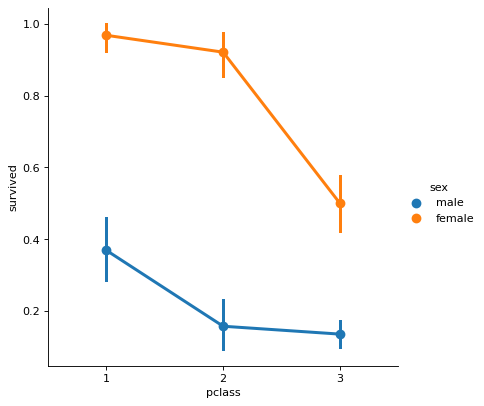

In [31]:
sns.catplot(x='pclass',y='survived',data=titanic,kind='point',hue='sex')

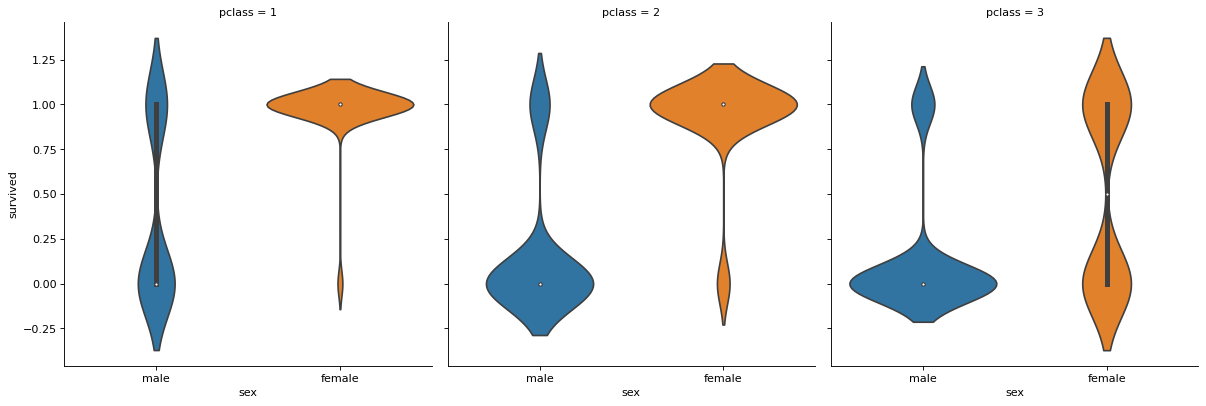

In [32]:
sns.catplot(x='sex',y='survived',data=titanic,kind='violin',col='pclass')

<AxesSubplot:>

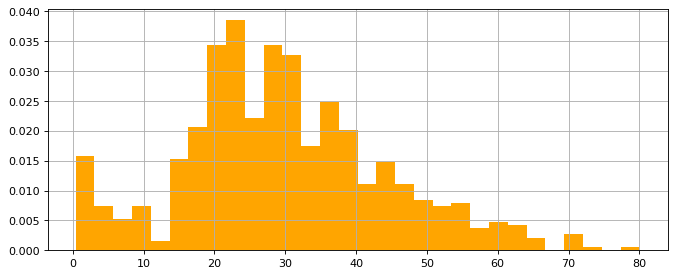

In [33]:
titanic['age'].hist(bins=30,density=True,color='orange',figsize=(10,4))

<AxesSubplot:xlabel='age', ylabel='Density'>

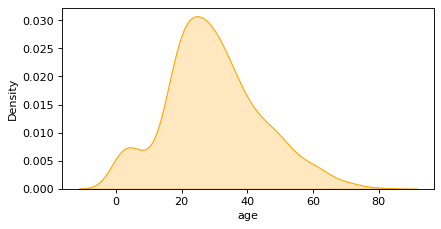

In [34]:
sns.kdeplot(titanic['age'],shade=True,color='orange')

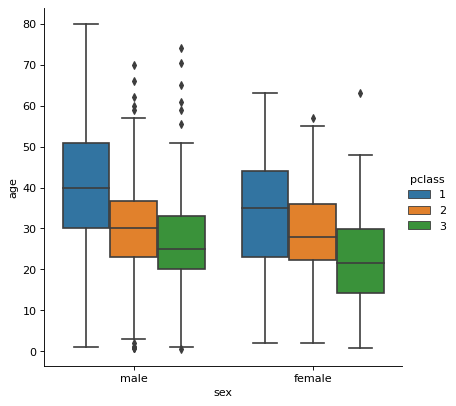

In [35]:
sns.catplot(x='sex',y='age',data=titanic,kind='box',hue='pclass')

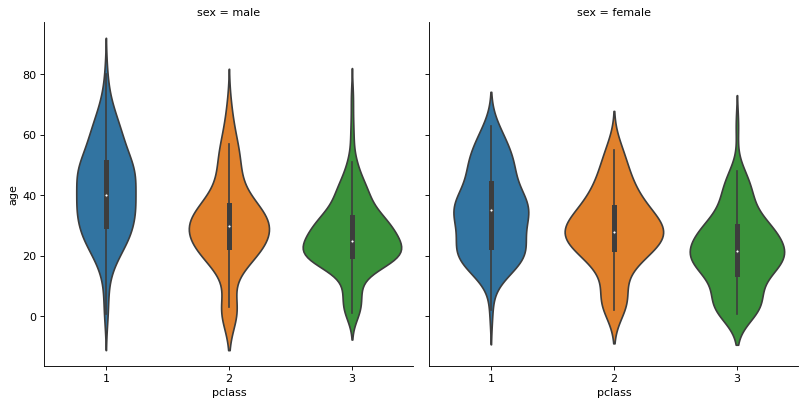

In [40]:
sns.catplot(x='pclass',y='age',kind='violin',data=titanic,col='sex',split=True)

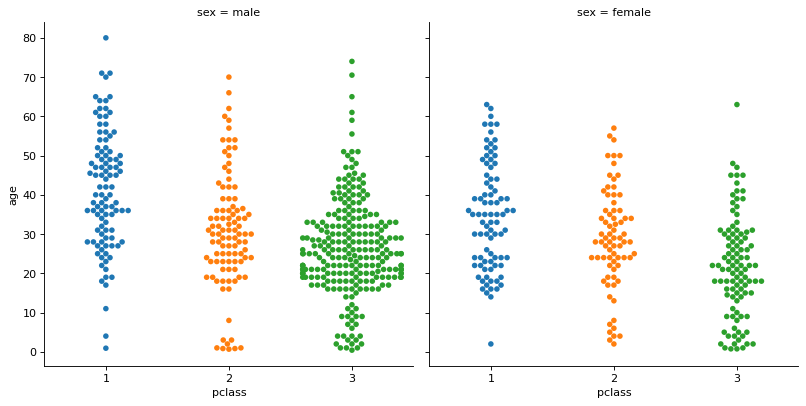

In [45]:
sns.catplot(x = 'pclass',y='age',data=titanic,kind='swarm',col='sex')

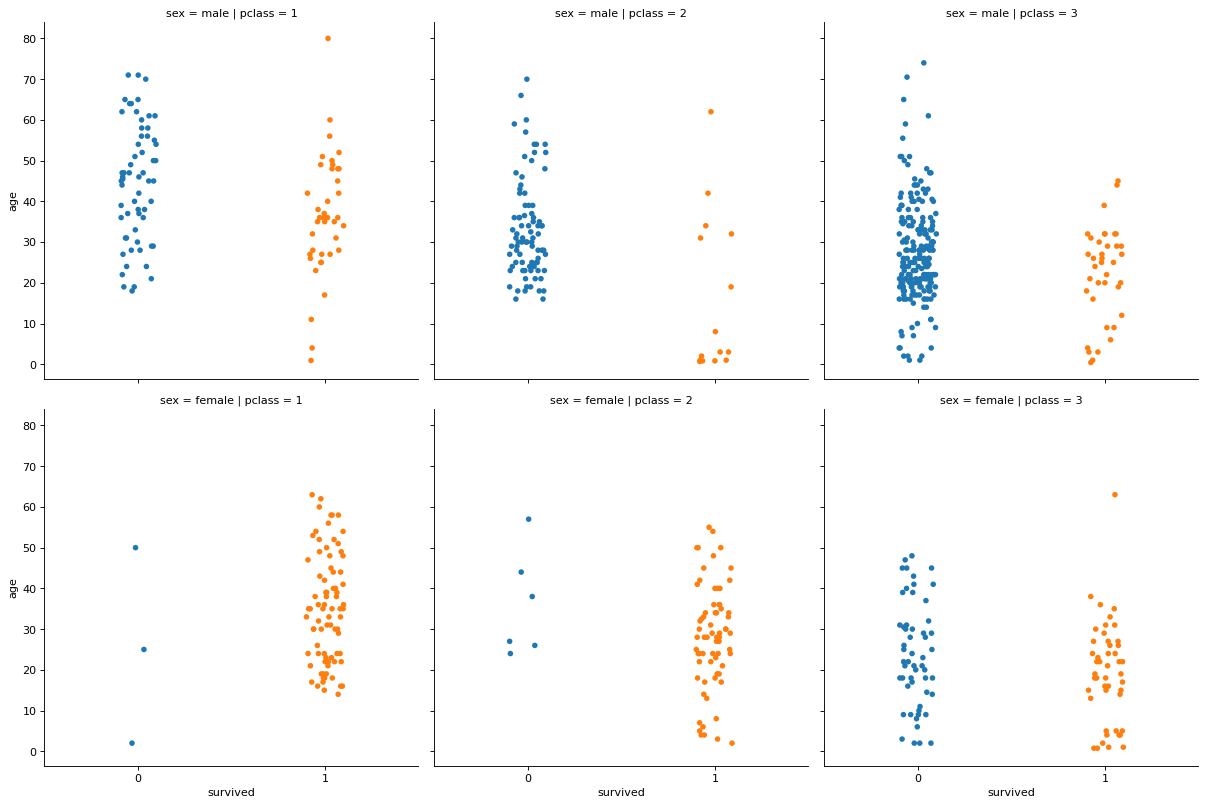

In [50]:
sns.catplot(x='survived',y='age',data=titanic,row='sex',col='pclass')